In [7]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt

## Starting Example

In [8]:
#result = subprocess.run(['C:/Users/kathr/Downloads/alterbbn_v2.2/stand_cosmo.x', '3'], capture_output = True, text = True)

In [9]:
#print(result.stdout)

In [10]:
#result_str = result.stdout

In [11]:
#result_splt = result_str.split('\t')

In [12]:
#result_splt[12]

## Creating functions for alter_eta & alter_vs plots

In [24]:
def clean_directory(directory, file):
    # enter your file directory for alterbbn_v2.2 
    #run_directory = 'C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2/alter_eta_edit.x'
    #run_directory_new = 'C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2/alter_vs.x'

    directory = 'C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2'

    ch = subprocess.run(['make','-C', directory, 'clean'], capture_output = True, text = True, shell = True)
    sh = subprocess.run(['make', '-C', directory, file], capture_output = True, text = True, shell = True)
    print(ch.stderr)
    print(sh.stderr)

In [25]:
#clean_directory('C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2', 'alter_vs.c')


make: Circular alter_vs.c <- alter_vs.c dependency dropped.



In [1]:
def output_plots_alter_vs(nu_start, nu_end, nu_steps, run_directory_new, row, ns0, mass, mixangle):   
    #nu = np.linspace(1e-10, 10e-10, 40)
    nu = np.linspace(nu_start, nu_end, nu_steps)

    Yp_vs = np.zeros(len(nu))
    H2_H_vs = np.zeros(len(nu))
    He3_H_vs = np.zeros(len(nu))
    Li7_H_vs = np.zeros(len(nu))
    Li6_H_vs = np.zeros(len(nu))
    Be7_H_vs = np.zeros(len(nu))

    a = 0

    for i in nu:
        d = subprocess.run([run_directory_new, '14.87365053664758', str(i), '1', row, ns0, mass, mixangle], capture_output = True, text = True, shell = True)
        print(d)
        print(d.stderr)
        x = d.stdout
        #print(x)
        s = x.split('\t')
        #print(s)

        Yp_vs[a] = float(s[12])
        H2_H_vs[a] = float(s[13])
        He3_H_vs[a] = float(s[14])
        Li7_H_vs[a] = float(s[15])
        Li6_H_vs[a] = float(s[16])
        #Be7_H[a] = float(s[17])
        a += 1
    
    plt.figure()
    plt.loglog(nu, Li7_H_vs)
    plt.ylabel('Li7/H')
    plt.xlabel('$\eta_0$')
    #plt.ylim(10e-11, 10e-9)
    #plt.xlim(1e-10, 10e-10)
    plt.show()

    plt.figure()
    plt.loglog(nu, He3_H_vs)
    plt.ylabel('He3/H')
    plt.xlabel('$\eta_0$')
    #plt.ylim(10e-7, 10e-4)
    #plt.xlim(1e-10, 10e-10)
    plt.show()
    
    #return Yp_vs, H2_H_vs, He3_H_vs, Li7_H_vs, Li6_H_vs

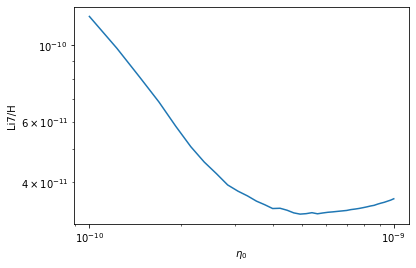

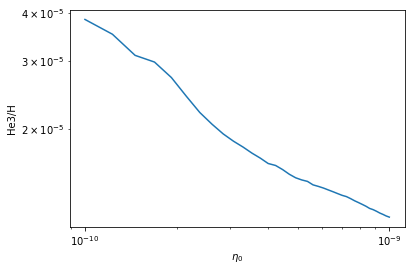

In [16]:
#output_plots_alter_vs(1e-10, 10e-10, 40,'C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2/alter_vs.x')

In [29]:
#clean_directory('C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2', 'alter_eta_edit.c')


make: Circular alter_eta_edit.c <- alter_eta_edit.c dependency dropped.



In [32]:
def output_arrays_alter_eta(nu_start, nu_end, nu_steps, run_directory):
    nu = np.linspace(nu_start, nu_end, nu_steps)
    
    Yp = np.zeros(len(nu))
    H2_H = np.zeros(len(nu))
    He3_H = np.zeros(len(nu))
    Li7_H = np.zeros(len(nu))
    Li6_H = np.zeros(len(nu))
    Be7_H = np.zeros(len(nu))

    a = 0

    for i in nu:
        d = subprocess.run([run_directory, str(i)], capture_output = True, text = True, shell = True)
        #print(d.stderr)
        x = d.stdout
        #print(x)
        s = x.split('\t')
        #print(s)

        Yp[a] = float(s[12])
        H2_H[a] = float(s[13])
        He3_H[a] = float(s[14])
        Li7_H[a] = float(s[15])
        Li6_H[a] = float(s[16])
        #Be7_H[a] = float(s[17])
        a += 1

    plt.figure()
    plt.loglog(nu, Li7_H)
    plt.ylabel('Li7/H')
    plt.xlabel('$\eta_0$')
    plt.ylim(10e-11, 10e-9)
    plt.xlim(1e-10, 10e-10)
    plt.show()

    plt.figure()
    plt.loglog(nu, He3_H)
    plt.ylabel('He3/H')
    plt.xlabel('$\eta_0$')
    plt.ylim(10e-7, 10e-4)
    plt.xlim(1e-10, 10e-10)
    plt.show()
        
    #return Yp, H2_H, He3_H, Li7_H, Li6_H

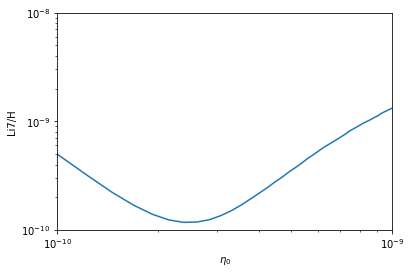

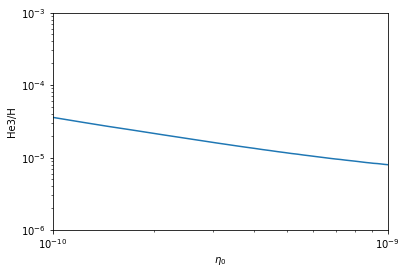

In [33]:
#output_arrays_alter_eta(1e-10, 10e-10, 40,'C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2/alter_eta_edit.x')